# Week 3 Check-In
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan
GitHub Link: https://github.com/ketexon/csm148-spotiflies 

In [55]:
%pip install pandas numpy matplotlib seaborn scikit-learn mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Reading in the Data
We used the cleaned version of our dataset from the week 2 check in.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Reading in the cleaned data from previous week check in
spotify = pd.read_csv("csv_outputs/cleaned_spotify.csv")
numeric_spotify = spotify.select_dtypes(include=[np.number])
numeric_spotify = numeric_spotify.loc[:, ~numeric_spotify.columns.isin(["mode", "key", "time_signature"])]
numeric_spotify

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
113994,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113995,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113996,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113997,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


### Regression

We chose to use the `energy` variable as our response variable, as it seemed to have the most relationships with other variables, and we are interested into finding out what contributes to the energy of a song.

For our predictor variables, we used forward feature selection to see which predictors may be most correlated with our response variable, and found that `'loudness', 'acousticness', 'instrumentalness', 'liveness',` and `'valence'` were our selected features.

In [57]:
# Making scatterplots for each variable vs popularity
# correlated_features = [
#     ("energy", "popularity"),
# ]
# for (i, j) in correlated_features:
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 1))(np.unique(numeric_spotify[i])), color='red')
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 2))(np.unique(numeric_spotify[i])), color='orange')
#     plt.scatter(numeric_spotify[i], numeric_spotify[j], s=5)
#     plt.xlabel(i)
#     plt.ylabel(j)
#     plt.show()

Selected Features:  ['loudness' 'acousticness' 'instrumentalness' 'liveness' 'valence']


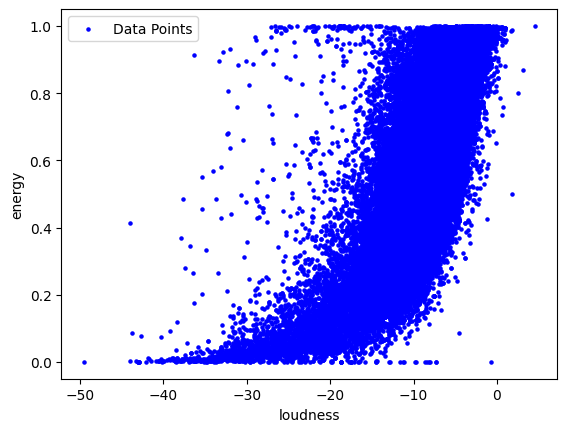

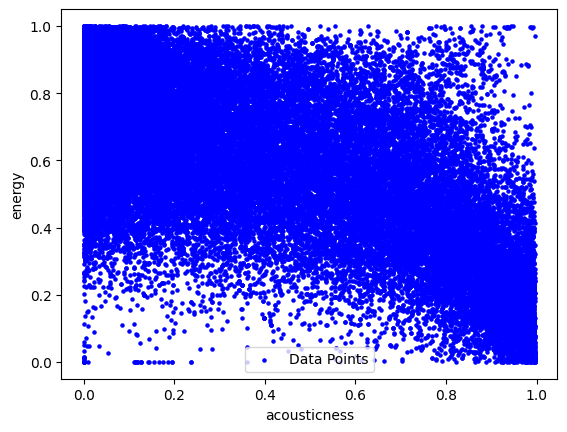

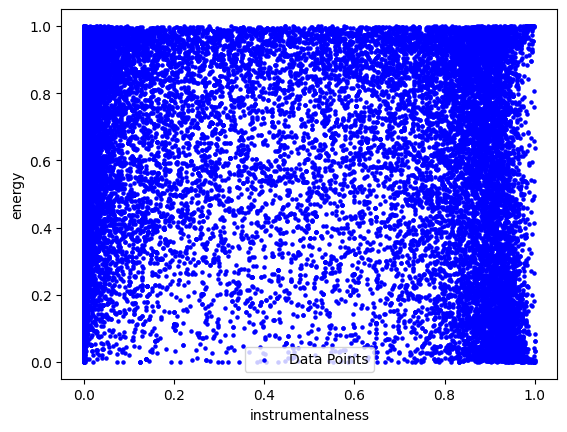

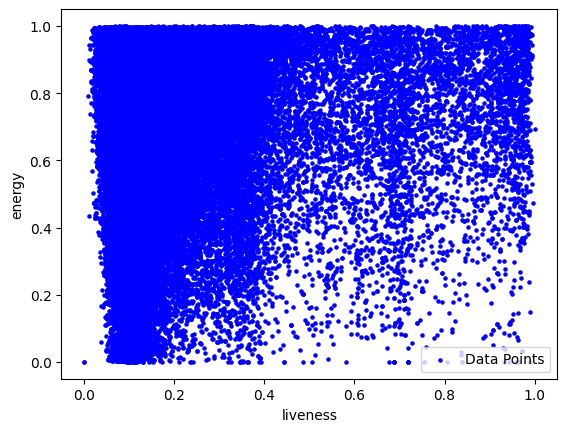

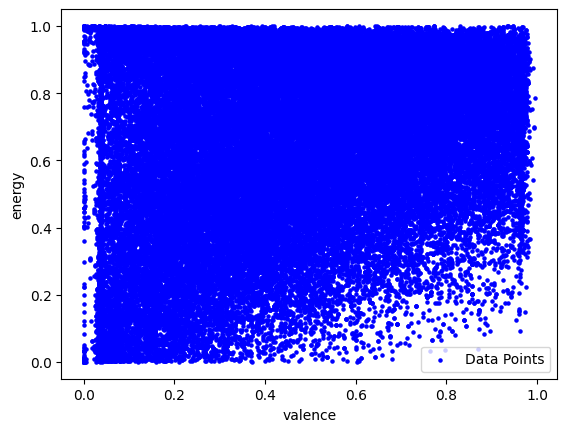

In [58]:
# Modeling regression of energy versus popularity
# We are doing a linear and quadratic regression analysis.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector


random_seed = 42
response = "energy"

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(numeric_spotify, test_size=0.2, random_state=random_seed)

# Second split: separate remaining 80% into 60% training and 40% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Reshape the data to fit the model
X_train = spotify_train.drop(columns=response)
y = spotify_train[response]

linear_reg = LinearRegression()

# Select features
selector = SequentialFeatureSelector(
    linear_reg,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train, y)
selected_features = selector.get_feature_names_out(X_train.columns)
print("Selected Features: ", selected_features)

# Transform data sets
X = selector.transform(X_train)

X_test = selector.transform(spotify_test.drop(columns=response))
y_test = spotify_test[response]

X_val = selector.transform(spotify_val.drop(columns=response))
y_val = spotify_val[response]


# Fit the Linear Regression model
linear_reg.fit(X, y)

# Predict values of y based on the model
y_pred = linear_reg.predict(X)

# Plotting the scatter plot of the original data
for feature in selected_features:
    plt.scatter(X_train[feature], y, color='blue', s=5, label="Data Points")

    plt.xlabel(feature)
    plt.ylabel(response)
    plt.legend()

    # plt.plot(spotify_train[feature], y_pred, color='red', label="Regression Line")

    plt.show()


# # Plotting the regression line
# plt.plot(spotify_train[features], y_pred, color='red', label="Regression Line")

# Adding labels and title

# Show the plot

### Evaluation Metrics

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.evaluate import bias_variance_decomp

# Calculating Evaluation Metrics:
y_val_pred = linear_reg.predict(X_val) # Predict on validation set

# Calculate metrics for the training set
train_mse = mean_squared_error(y, y_pred) # Mean squared error
train_rmse = np.sqrt(train_mse) # Root mean squared error
train_mae = mean_absolute_error(y, y_pred) # Mean average error
train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

# Calculate metrics for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mad = np.mean(np.abs(y_val - y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print Results:
print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

# bias variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    linear_reg,
    X, y.values,
    X_test, y_test.values,
    loss='mse',
    random_seed=123
)

print(f"Loss, variance, and bias: {avg_expected_loss}, {avg_bias}, {avg_var}")

Training MSE: 0.016271711981592427, rMSE: 0.12756062081062644, MAE: 0.0993956250811578, MAD: 0.0993956250811578, R²: 0.7428611885163133
Validation MSE: 0.016148446469073437, rMSE: 0.12707653783871134, MAE: 0.09929688057551378, MAD: 0.09929688057551378, R²: 0.7455912411058057
Loss, variance, and bias: 0.01626304898193079, 0.01626104607587408, 2.0029060567100168e-06


Based on the evaluation metrics we calculated above, our model seems to fit the data decently. 

Most notably, the MSE is very low and close together for the training and validation sets, 0.016 for both. This suggests there is low error and the model fits the data.

The R^2 values (0.743 and 0.746) are moderately strong, which indicates that the model is explaining a good amount of the variance in the dependent variable (energy). 

### Regularization

In [60]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate
import plotly.express as px


# find alpha
alphas = np.logspace(-1, 6, 100)

# create an empty list to store the cross-validation scores
ridge_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(
        estimator=ridge,
        X=X,
        y=y,
        cv=10,
        scoring='neg_root_mean_squared_error'
    )
    ridge_cv_scores.append({
        'alpha': alpha,
        'log_alpha': np.log(alpha),
        'test_mse': -np.mean(ridge_cv['test_score'])
    })

# convert the cross-validation scores into a data frame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(ridge_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Ridge')

# use 10-fold cross-validation to select the best lambda (alpha) value for the lasso regression model

# define the alpha values to test
# note that the start/stop values in the first two arguments are the exponents
alphas = np.logspace(-1, 4, 100)

# create an empty list to store the cross-validation scores
lasso_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_cv = cross_validate(estimator=lasso,
                              X=X,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    lasso_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(lasso_cv['test_score'])})

# convert the cross-validation scores into a data frame
lasso_cv_scores_df = pd.DataFrame(lasso_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(lasso_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Lasso')

In [61]:
# identify the value of alpha that minimizes the cross-validation score for ridge
ridge_alpha_min = ridge_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_ridge = ridge_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_ridge = ridge_cv_scores_df['test_mse'].min()


# identify the value of alpha that minimizes the cross-validation score for ridge within 1SE
ridge_alpha_1se = ridge_cv_scores_df[(ridge_cv_scores_df['test_mse'] <= mse_min_ridge + mse_se_ridge) &
                                     (ridge_cv_scores_df['test_mse'] >= mse_min_ridge - mse_se_ridge)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


# identify the value of alpha that minimizes the cross-validation score for lasso
lasso_alpha_min = lasso_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_lasso = lasso_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_lasso = lasso_cv_scores_df['test_mse'].min()

# identify the value of alpha that minimizes the cross-validation score for lasso within 1SE
lasso_alpha_1se = lasso_cv_scores_df[(lasso_cv_scores_df['test_mse'] <= mse_min_lasso + mse_se_lasso) &
                                     (lasso_cv_scores_df['test_mse'] >= mse_min_lasso - mse_se_lasso)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]
print('Ridge (min): ', ridge_alpha_min)
print('Ridge (1SE): ', ridge_alpha_1se)
print('Lasso (min): ', lasso_alpha_min)
print('Lasso (1SE): ', lasso_alpha_1se)

Ridge (min):  0.2656087782946686
Ridge (1SE):  2056.5123083486515
Lasso (min):  0.1
Lasso (1SE):  0.2848035868435802


In [63]:
# use ridge_alpha_min to fit the ridge regression model
ridge_min_fit = Ridge(alpha=ridge_alpha_min).fit(X=X, y=y)
ridge_1se_fit = Ridge(alpha=ridge_alpha_1se).fit(X=X, y=y)

# use lasso_alpha_min to fit the lasso regression model
lasso_min_fit = Lasso(alpha=lasso_alpha_min).fit(X=X, y=y)
lasso_1se_fit = Lasso(alpha=lasso_alpha_1se).fit(X=X, y=y)

### Finding the Evaluation Metrics for the Ridge and Lasso Regressions

In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.evaluate import bias_variance_decomp

names = {
    ridge_min_fit: "Ridge (Min)",
    ridge_1se_fit: "Ridge (1se)",
    lasso_min_fit: "Lasso (Min)",
    lasso_1se_fit: "Lasso (1se)",
}

for model in [ridge_min_fit, ridge_1se_fit, lasso_min_fit, lasso_1se_fit]:
    print("Model: ", names[model])
    # Calculating Evaluation Metrics:
    y_val_pred = model.predict(X_val) # Predict on validation set

    # Calculate metrics for the training set
    train_mse = mean_squared_error(y, y_pred) # Mean squared error
    train_rmse = np.sqrt(train_mse) # Root mean squared error
    train_mae = mean_absolute_error(y, y_pred) # Mean average error
    train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
    train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

    # Calculate metrics for the validation set
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mad = np.mean(np.abs(y_val - y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    # Print Results:
    print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
    print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")

    # bias variance
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        linear_reg,
        X, y.values,
        X_test, y_test.values,
        loss='mse',
        random_seed=123
    )

    print(f"Loss, variance, and bias: {avg_expected_loss}, {avg_bias}, {avg_var}")
    print()

Model:  Ridge (Min)
Training MSE: 0.016271711981592427, rMSE: 0.12756062081062644, MAE: 0.0993956250811578, MAD: 0.0993956250811578, R²: 0.7428611885163133
Validation MSE: 0.016148433146922513, rMSE: 0.12707648542087757, MAE: 0.09929713671587564, MAD: 0.09929713671587564, R²: 0.745591450988031
Loss, variance, and bias: 0.01626304898193079, 0.01626104607587408, 2.0029060567100168e-06

Model:  Ridge (1se)
Training MSE: 0.016271711981592427, rMSE: 0.12756062081062644, MAE: 0.0993956250811578, MAD: 0.0993956250811578, R²: 0.7428611885163133
Validation MSE: 0.017142449310159395, rMSE: 0.13092917669549212, MAE: 0.10398596240769038, MAD: 0.10398596240769038, R²: 0.7299313428225691
Loss, variance, and bias: 0.01626304898193079, 0.01626104607587408, 2.0029060567100168e-06

Model:  Lasso (Min)
Training MSE: 0.016271711981592427, rMSE: 0.12756062081062644, MAE: 0.0993956250811578, MAD: 0.0993956250811578, R²: 0.7428611885163133
Validation MSE: 0.026818980504911424, rMSE: 0.16376501612038946, MAE:

write conclusion here